###Bound on elements of $K^{-1}y$

If we consider the case of two positively correlated variables (zero mean). We can see that the two eigenvectors will lie in the [1,1] and [-1,1] direction. The more correlated the two variables, the smaller the smallest eigenvalue will be.

<img src="correlation_example1.png">


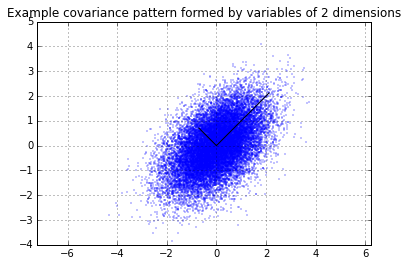

In [46]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_shape(corr):
    X = np.random.multivariate_normal(np.zeros(corr.shape[0]),corr,20000)
    plt.plot(X[:,0],X[:,1],'.',markersize=1)
    plt.axis('equal')
    plt.grid('on')
    plt.axes()
    plt.title('Example covariance pattern formed by variables of %d dimensions' % corr.shape[0])
    eig_val, eig_vec = np.linalg.eig(corr)
    for i in range(len(eig_val)):
        ev = eig_vec[:,i]*eig_val[i]*2
        plt.plot([0,ev[0]],[0,ev[1]],'k-')
plot_shape(np.array([[1,0.5],[0.5,1]]))

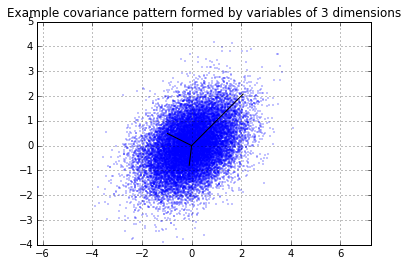

In [48]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plot_shape(np.array([[1,0.4,0.4],[0.4,1,0.4],[0.4,0.4,1]]))

#The scaled eigenvectors are projected onto the 2d x,y plane.

One can imagine how this extends to further dimensions, with each dimension (with correlation) added making the smallest eigenvalue even smaller. 

However, the eigenvectors will no longer face in the [1,-1,...] directions. In the figure above, one can see that the two smaller eigenvectors are not in any of the [1,-1...1] directions.

The largest value that $\mathbf{y}$ can provide is bounded along the surfaces of the $-1$ to $+1$ hypercube. The eigenvectors don't (generally) point in these directions (e.g. [-1,+1,+1,+1]). So the largest value of $K^{−1}y$ will involve the combination of several eigenvalues/vectors.

This figure tries to illustrate this.

<img src="correlation_example2.png">

In the above figure, it is the reprojection into the space of the eigenvectors, combined with the sum of the eigenvector contributions, means that some elements of the output vector can be larger than one.

We can consider the amount a vector could be scaled, and it seems likely that **a proper upperbound will be $\sqrt{\sum \lambda_i^2}$.**

Note: Interestingly, in the limit of a large number of equally spaced points, it seems that the largest value in the $K^{−1}y$ vector **is** equal to the inverse of the smallest eigenvalue in $K^{-1}$. 

In summary: For now I'll assume that the largest value in the vector $K^{−1}y$ is roughly equal to the maximum eigenvalue of $K^{-1}$.

The following code demonstrates these bounds for an arbitrary number of dimensions. Points are places on a **square grid** (closest packing would be interesting, but packings at higher dimensions have not been proved or known).

In [50]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def kern(a,b): 
    a1 = x.repeat(x.shape[1],axis=1)
    b1 = np.tile(x,x.shape[1])
    return np.exp(-np.sum((a1-b1)**2,axis=0)).reshape(x.shape[1],x.shape[1])

N = 12 #number of steps in each dimension
dims = 2 #number of dimensions
dist = 1.4 #distance between points
x = np.arange(0,N)*dist

Ntot = 1
for it in range(dims-1):
    Ntot = Ntot * N
    x = np.vstack([np.tile(x,N),(np.arange(0,N)*dist).repeat(Ntot)])
    
K = kern(x,x)
G = np.linalg.inv(K)

print "Maximum value in Gy (for -1<y<1) = %0.4f" % (np.max(np.sum(np.abs(G),axis=0)))
eigenvalues, _ = np.linalg.eig(K)
print "1/smallest eigenvalue = %0.4f" % (1.0/np.min(eigenvalues))
print "euclidean distance = %0.4f" % np.sqrt(np.sum((1.0/eigenvalues)**2))

Maximum value in Gy (for -1<y<1) = 1.9340
1/smallest eigenvalue = 1.8911
euclidean distance = 13.4410


Some example results:

| Number of dimensions | Number of points in each dimension | Minumum distance between points | Actual maximum value in $K^{-1}y$ | Inverse of smallest eigenvalue  ($1/\lambda$) | Length of combined eigenvalues $\sqrt{\sum \lambda_i^2}$ | Notes |
|----------------------|------------------------------------|---------------------------------|-----------------------------------|-----------------------------------------------|----------------------------------------------------------|---------------------------------------------------------------------------------------------------|
| 3 | 5 | 1 | 25.9 | 17.7 | 38.0 | When only a few points are close together, the approximate value ($1/\lambda$) does not work. |
| 3 | 9 | 1 | 35.2 | 27.7 | 108.4 | With enough points, it starts to approach the correct value. The correct bound becomes very poor (too big). |
| 3 | 15 | 1 | 36.72 | 32.87 | 253.02 | In the limit the $1/\lambda_{min}$ bound (for an infinite number of points) starts to be ideal, for any number of points. |
| 2 | 50 | 1 | 11.1 | 11.0 | 140.4 | Another example of the above bound working, using 2d data. |
| 2 | 3 | 1 | 5.5 | 4.2 | 5.7 | |
| 3 | 10 | 10 | 1.00 | 1.00 | 11.18 | Putting the points far apart. Again, the 'correct' bound is much larger than the real value. |
| 3 | 5 | 2 | 1.118 | 1.101 | 11.207 | Just enough distance makes our approximation reasonable. |
| 6 | 3 | 2 | 1.246 | 1.17 | 27.11 | Even with lots of dimensions the approximation isn't far off. |
| 6 | 3 | 1.6 | 2.55 | 2.00 | 29.02 | The result is sensitive to this distance, and is weaker at higher dimensions. |

It is worth noting that the tightest bound seems to be $1/\lambda_{min}$ for an infinite number of points. The more easily computed $\sqrt{\sum \lambda_i^2}$ is a more solid upper bound, but is unreasonably large for many cases.

For my purposes I'll state that:

the largest value of an element in $\mathbf{a} = K^{-1}\mathbf{y}$ is bounded by $|a_i| \leq 2 \times y_{max}$. We just need to select the distance between points such that this bound is preserved.

For two dimensions this distance is 1.4 $\times$ length scale.

This seems a long way apart, but hopefully, by using inducing points, this constraint won't be too serious. If it is we can switch to using the above calculated bounds. We would need to be careful in that case as the noise statistics will hold information about the data.

Ideally, if we put a bound on how correlated each pair of variables is (i.e. by proximity of points), how do we find a bound for the largest eigenvalue in the $K^{-1}$ matrix? We can use this as an alternative way of making a bound by noting that all the other eigenvalues are equal or less to this value, so the scaling effect of the transform will be bounded by $\sqrt{N_{inputs} \times \lambda_{max}^{2}}$. (where $\lambda_{max}$ is the largest value in the inverse covariance matrix).


###Size of the kernel value

The equation above depends on summing over a set of kernels (scaled by the above values). What bounds can we set on this sum?

$\sum_i \sum_j k(x_i, x_j)$

We have decreed that the points $\mathbf{x}$ are placed at least $d$ apart. So the sum of (stationary) kernels will be bounded.

$e^{-1^2} + e^{-2^2} +\;... $

This looks like the integral of a gaussian.

